In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [2]:
dir_fig = 'fragile_x/'

In [3]:
file_in = '/expanse/projects/sebat1/miladm/UCSD/LONG_READ_COHORT/METHYLATION/snoopsv_methyl/methyl_data.tsv'
df = pd.read_table(file_in, sep='\t', header=0, keep_default_na=False)
display(df)

file_sam = '/expanse/projects/sebat1/miladm/UCSD/LONG_READ_COHORT/METHYLATION/snoopsv_methyl/methyl_data_sample_order.txt'
with open(file_sam, 'r') as fh:
    sample_order = fh.readline().split(',')[:-1] # last one is an empty string
print(f'number of samples: {len(sample_order)}')
print(f'sample order: {sample_order}')

,chrom,pos,end,region_id,methyl_h1,methyl_h2,methyl_h0,bp_dev_h1,bp_dev_h2,bp_dev_h0,rn_h1,rn_h2,rn_h0
0,chrX,147911449,147911948,FMR1_FLANK_L,.;0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,.;66|66|94|96|98|100|100|100|100|100|100|100|1...,7;.;.;.;100|98|96|99|73|73|89|76|100|2|68|100|...,".;-1,0,-4,-1,0;.;0,0,0,4,-2;3,5,-26,2,.;.,9,-3...",".;0,13;.;-4,.,0,0;-9,1,1,-2,3;-7,-29,-5,-3;7,-...",".;.;.;.;18,-28;1,-8;.;-2,.;-10,.;.,.,.;5,-4,-1...",".;m64278e_211010_185620/154140982/ccs,m64278e_...",".;m64278e_211010_185620/26479446/ccs,m64278e_2...",m54340U_220419_233431/145490331/ccs;.;.;.;7502...
1,chrX,147911948,147912050,FMR1_BOUNDARY_L,".;0|0|0|0|0|0|0|0|1|5|1|0|0|0|0|0|0|0|0|0,100|...",.;99|12|93|98|98|100|100|100|100|100|100|100|1...,.;.;.;.;3|52|37|46|98|82|9|100|85|9|44|99|36|2...,".;0,0,0,1,0;.;0,0,0,0,0;30,-1,-2,36;15,42,-4;0...",".;81,89;.;2,84,90;5,6,-2,2,8;-4,6,5,0;9,3,-3,-...",".;.;.;.;3,36;-4,38;.;0;-1;.;-1,20,-1,18,0,1;19...",".;m64278e_211010_185620/154140982/ccs,m64278e_...",".;m64278e_211010_185620/26479446/ccs,m64278e_2...",".;.;.;.;75022d4b-27da-47c8-b283-ea520387ca2e,c..."
2,chrX,147911949,147912141,FMR1_CGG_PLUS_B,.;0|0|0|0|0|0|0|0|1|5|1|0|0|0|0|0|0|0|0|0|0|0|...,.;99|12|93|98|98|100|100|100|100|100|100|100|1...,.;.;.;.;3|52|37|46|98|82|9|100|85|9|44|99|36|2...,".;24,27,27,29,27;.;33,33,33,36,33;29,31,32,36;...",".;81,89;.;98,84,90;23,27,29,30,22;-7,13,6,6;42...",".;.;.;.;33,32;3,39;.;44;73;.;13,17,17,14,13,21...",".;m64278e_211010_185620/154140982/ccs,m64278e_...",".;m64278e_211010_185620/26479446/ccs,m64278e_2...",".;.;.;.;75022d4b-27da-47c8-b283-ea520387ca2e,c..."
3,chrX,147912051,147912110,FMR1_CGG,.;0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,.;99|99|99|99|99|100|100|100|100|100|100|100|1...,.;.;.;.;98|98|21|99|100|75|57|86|44|96|84|98|9...,".;24,27,27,27,27;.;33,33,33,36,33;2,27,32,0;86...",".;0,0;.;96,0,0;18,0,30,28,15;0,5,-1,6;22,22,25...",".;.;.;.;22,0;6,0;.;45;78;.;15,-3,21,0,16,19;73...",".;m64278e_211010_185620/154140982/ccs,m64278e_...",".;m64278e_211010_185620/26479446/ccs,m64278e_2...",".;.;.;.;75022d4b-27da-47c8-b283-ea520387ca2e,c..."
4,chrX,147912111,147912141,FMR1_BOUNDARY_R,".;0|0|0|0,100|99|100|100,55|64|64|78,0|0|1|0,0...",".;99|100|100|98,91|82|68|82;.;74|78|96|96,100|...",".;.;.;.;8|31|70|88,74|68|0|25;0|0|0|0,2|1|7|4;...",".;0,0,0,1,0;.;0,0,0,0,0;-3,5,2,0;-3,5,1;6,-1;....",".;0,0;.;0,0,0;0,21,1,0,-1;-3,2,2,0;11,-1,2,0;....",".;.;.;.;9,-5;1,1;.;-1;-4;.;-1,0,-3,-4,-3,1;-3,...",".;m64278e_211010_185620/154140982/ccs,m64278e_...",".;m64278e_211010_185620/26479446/ccs,m64278e_2...",".;.;.;.;75022d4b-27da-47c8-b283-ea520387ca2e,c..."
5,chrX,147912142,147912641,FMR1_FLANK_R,.;0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,.;94|62|99|86|68|66|95|96|99|100|100|100|100|1...,.;.;.;.;88|3|59|100|37|83|4|17|97|93|0|98|72|1...,".;0,0,2,2,0;.;.,0,.,-1,0;-2,-14,-2,4,.;3,-16,0...",".;0,4;.;1,0,0;-5,-14,-5,-6,-18;-36,-26,-11,1;3...",".;.;.;.;.,-14;4,-10;.;-15;-23;.;-17,-14,-2,-36...",".;m64278e_211010_185620/154140982/ccs,m64278e_...",".;m64278e_211010_185620/26479446/ccs,m64278e_2...",".;.;.;.;75022d4b-27da-47c8-b283-ea520387ca2e,c..."


number of samples: 12
sample order: ['REACH000450', 'REACH000451', 'REACH000452', 'REACH000453', 'REACH000518', 'REACH000519', 'REACH000523', 'REACH000524', 'REACH000560', 'REACH000561', 'REACH000562', 'REACH000563']


In [4]:
df_exnd = df[['chrom' ,'pos', 'end', 'region_id']].copy()
cols = df.columns.tolist()[4:]
#print(cols)

for idx, sample in enumerate(sample_order):
    if sample == 'REACH000450' or sample == 'REACH000452':
        continue
    for col in cols:
        df_exnd[f'{sample}_{col}'] = df[col].str.split(';').apply(lambda row: row[idx])
display(df_exnd)

,chrom,pos,end,region_id,REACH000451_methyl_h1,REACH000451_methyl_h2,REACH000451_methyl_h0,REACH000451_bp_dev_h1,REACH000451_bp_dev_h2,REACH000451_bp_dev_h0,...,REACH000562_rn_h0,REACH000563_methyl_h1,REACH000563_methyl_h2,REACH000563_methyl_h0,REACH000563_bp_dev_h1,REACH000563_bp_dev_h2,REACH000563_bp_dev_h0,REACH000563_rn_h1,REACH000563_rn_h2,REACH000563_rn_h0
0,chrX,147911449,147911948,FMR1_FLANK_L,0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,66|66|94|96|98|100|100|100|100|100|100|100|100...,.,"-1,0,-4,-1,0","0,13",.,...,"70638eee-9b25-4d63-b1ae-e50ac2da29ba,188bb432-...",.,.,100|100|100|0|28|86|25|98|100|96|100|78|75|78|...,.,.,"-9,-17,1,1,.,1,6,.",.,.,"3dc80ce9-433b-4051-9a5a-52005e0d3627,3014939c-..."
1,chrX,147911948,147912050,FMR1_BOUNDARY_L,"0|0|0|0|0|0|0|0|1|5|1|0|0|0|0|0|0|0|0|0,100|10...",99|12|93|98|98|100|100|100|100|100|100|100|100...,.,"0,0,0,1,0","81,89",.,...,"70638eee-9b25-4d63-b1ae-e50ac2da29ba,188bb432-...",.,.,80|95|100|100|99|99|97|1|93|89|7|97|99|98|99|7...,.,.,"19,-1,-3,21,9,40,9",.,.,"3dc80ce9-433b-4051-9a5a-52005e0d3627,3014939c-..."
2,chrX,147911949,147912141,FMR1_CGG_PLUS_B,0|0|0|0|0|0|0|0|1|5|1|0|0|0|0|0|0|0|0|0|0|0|0|...,99|12|93|98|98|100|100|100|100|100|100|100|100...,.,"24,27,27,29,27","81,89",.,...,"70638eee-9b25-4d63-b1ae-e50ac2da29ba,188bb432-...",.,.,80|95|100|100|99|99|97|1|93|89|7|97|99|98|99|7...,.,.,"89,91,75,22,101,49,.",.,.,"3dc80ce9-433b-4051-9a5a-52005e0d3627,3014939c-..."
3,chrX,147912051,147912110,FMR1_CGG,0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,99|99|99|99|99|100|100|100|100|100|100|100|100...,.,"24,27,27,27,27","0,0",.,...,"70638eee-9b25-4d63-b1ae-e50ac2da29ba,188bb432-...",.,.,95|76|86|25|86|100|94|100|99|68|99|96|94|98|97...,.,.,"73,93,81,0,92,5,.",.,.,"3dc80ce9-433b-4051-9a5a-52005e0d3627,3014939c-..."
4,chrX,147912111,147912141,FMR1_BOUNDARY_R,"0|0|0|0,100|99|100|100,55|64|64|78,0|0|1|0,0|0...","99|100|100|98,91|82|68|82",.,"0,0,0,1,0","0,0",.,...,"70638eee-9b25-4d63-b1ae-e50ac2da29ba,188bb432-...",.,.,"73|72|100,98|99|100|100,0|0|63|20,0|9|0|0|0|0,...",.,.,"-3,-1,-3,1,0,4",.,.,"3dc80ce9-433b-4051-9a5a-52005e0d3627,3014939c-..."
5,chrX,147912142,147912641,FMR1_FLANK_R,0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,94|62|99|86|68|66|95|96|99|100|100|100|100|100...,.,"0,0,2,2,0","0,4",.,...,"70638eee-9b25-4d63-b1ae-e50ac2da29ba,188bb432-...",.,.,99|79|86|96|86|55|78|0|100|100|2|50|100|100|10...,.,.,"-31,-15,-4,25,-16,4",.,.,"3dc80ce9-433b-4051-9a5a-52005e0d3627,3014939c-..."


In [5]:
bp_dev_thr = 60

In [6]:
### make a dataframe for each sample to represent each bp methylation in each region
#pd.set_option('display.max_rows', 10)
def get_bp_df(df_in, sample):
    df_bps = pd.DataFrame()
    read_hps = ['h1', 'h2', 'h0']
    read_haplotype_dict = {} # given a read names returns if the read is PM or N
    for read_hp in read_hps:
        for read_name, bp_dev in zip(df_in.loc[df_in.region_id=='FMR1_CGG_PLUS_B', f'{sample}_rn_{read_hp}'].values[0].split(','), 
                                     df_in.loc[df_in.region_id=='FMR1_CGG_PLUS_B', f'{sample}_bp_dev_{read_hp}'].values[0].split(',')):
            haplotype = 'Normal'
            if bp_dev == '.':
                haplotype = 'NA'
            elif int(bp_dev) >= bp_dev_thr:
                haplotype = 'Expanded'
            read_haplotype_dict[read_name] = haplotype
    print(read_haplotype_dict)
    for idx in range(df_in.shape[0]):
    #for idx in range(1):
        region_id = df_in.loc[idx, 'region_id']
        for read_hp in read_hps:
            m_region = df_in.loc[idx, f'{sample}_methyl_{read_hp}']
            #print(f'm_region: {m_region}')
    
            bp_dev_list = df_in.loc[idx, f'{sample}_bp_dev_{read_hp}'].split(',')
            read_name_list = df_in.loc[idx, f'{sample}_rn_{read_hp}'].split(',')
            
            if m_region == '.':
                continue
                
            m_reads = m_region.split(',')
            #print(f'm_reads: {m_reads}')
    
            m_bps = []
            read_names = []
            bp_devs = []
            hp_tags = []
            tmp = [x.split('|') for x in m_reads]
            for i_x, x in enumerate(tmp):
                m_bps.extend(x)
                #read_ids.extend([f'{region_id}_{read_hp}_{i_x}' for i in range(len(x))])
                read_names.extend([read_name_list[i_x] for i in range(len(x))])
                bp_devs.extend([bp_dev_list[i_x] for i in range(len(x))])
                hp_tags.extend([read_hp for i in range(len(x))])
            #print(f'm_bps: {m_bps}')
            #print(f'read_ids: {read_ids}')
    
            df_tmp = pd.DataFrame()
            df_tmp['region_id'] = [region_id for x in m_bps]
            df_tmp['methylation'] = m_bps
            df_tmp['read_name'] = read_names
            df_tmp['bp_dev'] = bp_devs
            df_tmp['hp_tag'] = hp_tags
    
            df_bps = pd.concat([df_bps, df_tmp], ignore_index=True)

    df_bps['methylation'] = df_bps['methylation'].astype(int)
    df_bps = df_bps.loc[df_bps.bp_dev!='.']
    df_bps['bp_dev'] = df_bps['bp_dev'].astype(int)
    #df_bps['haplotype'] = df_bps.bp_dev.apply(lambda x: 'PM' if x>=bp_dev_thr else 'N')
    df_bps['haplotype'] = df_bps.read_name.apply(lambda x: read_haplotype_dict[x] if x in read_haplotype_dict else 'NA')
    df_bps = df_bps.loc[df_bps.haplotype!='NA']
    #display(df_bps)
    return df_bps

In [30]:
sample = 'REACH000561'
df_bps = get_bp_df(df_exnd, sample)
pd.set_option('display.max_rows', 10)
display(df_bps.loc[df_bps.region_id=='FMR1_CGG_PLUS_B'])
tmp = df_bps.loc[df_bps.region_id=='FMR1_CGG_PLUS_B'][['read_name', 'haplotype']].value_counts()
display(tmp)
tmp_counts = tmp.index.get_level_values(1).value_counts()
print(tmp_counts)
for x in tmp_counts.index:
    print(tmp_counts[x])
#tmp.haplotype.value_counts()

{'7724cf04-7f3c-49e6-b840-80174c400253': 'NA', '19114533-768a-4ced-ad7b-094d4bb6f5d6': 'N', 'c492a9b7-2d1c-4693-a7b0-19d17f546cf2': 'N', 'ec8aaed5-76d5-4771-a827-44e8ed2c990a': 'N', '7495d16c-6d6c-4dbe-bbde-e68d8659a9b8': 'N', '941395da-9dda-4f8e-9869-77d47192c5c9': 'PM', 'bfa1c5a7-77b3-44a9-93ef-03b1511f537e': 'PM', 'f8e7ada6-aca1-421f-971f-0f10eb91aef8': 'PM', '0bd12d5a-9141-4216-a118-b7b525d84f29': 'PM', '5e232e55-a220-44dc-97f0-59c656712f6a': 'PM', '.': 'NA'}


,region_id,methylation,read_name,bp_dev,hp_tag,haplotype
692,FMR1_CGG_PLUS_B,0,19114533-768a-4ced-ad7b-094d4bb6f5d6,22,h1,N
693,FMR1_CGG_PLUS_B,75,19114533-768a-4ced-ad7b-094d4bb6f5d6,22,h1,N
694,FMR1_CGG_PLUS_B,26,19114533-768a-4ced-ad7b-094d4bb6f5d6,22,h1,N
695,FMR1_CGG_PLUS_B,62,19114533-768a-4ced-ad7b-094d4bb6f5d6,22,h1,N
696,FMR1_CGG_PLUS_B,0,19114533-768a-4ced-ad7b-094d4bb6f5d6,22,h1,N
...,...,...,...,...,...,...
1193,FMR1_CGG_PLUS_B,73,5e232e55-a220-44dc-97f0-59c656712f6a,68,h2,PM
1194,FMR1_CGG_PLUS_B,11,5e232e55-a220-44dc-97f0-59c656712f6a,68,h2,PM
1195,FMR1_CGG_PLUS_B,23,5e232e55-a220-44dc-97f0-59c656712f6a,68,h2,PM
1196,FMR1_CGG_PLUS_B,29,5e232e55-a220-44dc-97f0-59c656712f6a,68,h2,PM


read_name                             haplotype
f8e7ada6-aca1-421f-971f-0f10eb91aef8  PM           69
941395da-9dda-4f8e-9869-77d47192c5c9  PM           66
0bd12d5a-9141-4216-a118-b7b525d84f29  PM           65
bfa1c5a7-77b3-44a9-93ef-03b1511f537e  PM           61
7495d16c-6d6c-4dbe-bbde-e68d8659a9b8  N            52
c492a9b7-2d1c-4693-a7b0-19d17f546cf2  N            51
19114533-768a-4ced-ad7b-094d4bb6f5d6  N            49
ec8aaed5-76d5-4771-a827-44e8ed2c990a  N            49
5e232e55-a220-44dc-97f0-59c656712f6a  PM           44
Name: count, dtype: int64

haplotype
PM    5
N     4
Name: count, dtype: int64
5
4


{'m64278e_211010_185620/154140982/ccs': 'Normal', 'm64278e_211010_185620/16843317/ccs': 'Normal', 'm64278e_211010_185620/90178882/ccs': 'Normal', 'm64278e_211010_185620/23136680/ccs': 'Normal', 'm64278e_211010_185620/17695614/ccs': 'Normal', 'm64278e_211010_185620/26479446/ccs': 'Expanded', 'm64278e_211010_185620/90769303/ccs': 'Expanded', '.': 'NA'}
fragile_x//methylation_probs_REACH000451.png


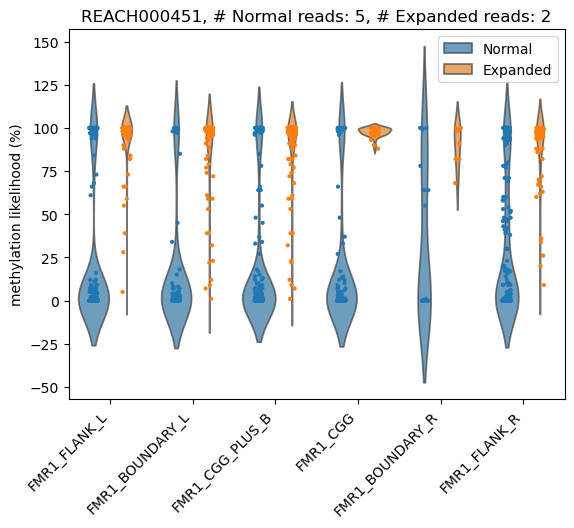

{'m64278e_211012_051244/63963533/ccs': 'Normal', 'm64278e_211012_051244/74647917/ccs': 'Normal', 'm64278e_211012_051244/74580685/ccs': 'Normal', 'm64278e_211012_051244/53544544/ccs': 'Normal', 'm64278e_211012_051244/49547513/ccs': 'Normal', 'm64278e_211012_051244/161089542/ccs': 'Expanded', 'm64278e_211012_051244/105579642/ccs': 'Expanded', 'm64278e_211012_051244/117704336/ccs': 'Expanded', '.': 'NA'}
fragile_x//methylation_probs_REACH000453.png


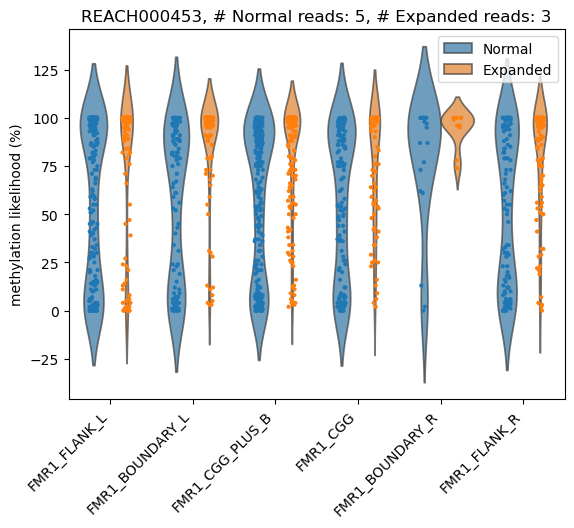

In [7]:
### family of REACH000450
samples = ['REACH000451', 'REACH000453']

for sample in samples:
    df_bps = get_bp_df(df_exnd, sample)
    target_regions = ['FMR1_CGG', 'FMR1_CGG_PLUS_B', 'FMR1_BOUNDARY_L', 'FMR1_FLANK_L', 'FMR1_BOUNDARY_R', 'FMR1_FLANK_R']
    #target_regions = ['FMR1_CGG_PLUS_B', 'FMR1_BOUNDARY_L']
    df_flt = df_bps.loc[df_bps.region_id.isin(target_regions)]
    #pd.set_option('display.max_rows', 10)
    #display(df_flt)
    counts = df_bps.loc[df_bps.region_id=='FMR1_CGG_PLUS_B'][['read_name', 'haplotype']].value_counts()
    counts_hap = counts.index.get_level_values(1).value_counts()
    title = sample
    for hp in counts_hap.index:
        title = f'{title}, # {hp} reads: {counts_hap[hp]}'
    hue_order = []
    for hp in ['Normal', 'Expanded']:
        if hp in counts_hap.index:
            hue_order.append(hp)
    plt.figure()
    sb.violinplot(data=df_flt, x='region_id', y='methylation', hue='haplotype', dodge=True, hue_order=hue_order, alpha=0.7, inner=None)
    ax = sb.stripplot(data=df_flt, x="region_id", y="methylation", hue='haplotype', jitter=True, dodge=True, legend=False, hue_order=hue_order, size=3)
    ax.get_legend().set_title("")
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('')
    plt.ylabel('methylation likelihood (%)')
    plt.title(title)
    fig_name = f'{dir_fig}/methylation_probs_{sample}.png'
    print(fig_name)
    plt.savefig(fig_name, bbox_inches='tight')
    plt.show()
    plt.close()

{'.': 'NA', '7038ca9a-2f43-487f-a128-12659f7d3a55': 'Expanded'}
fragile_x//methylation_probs_REACH000560.png


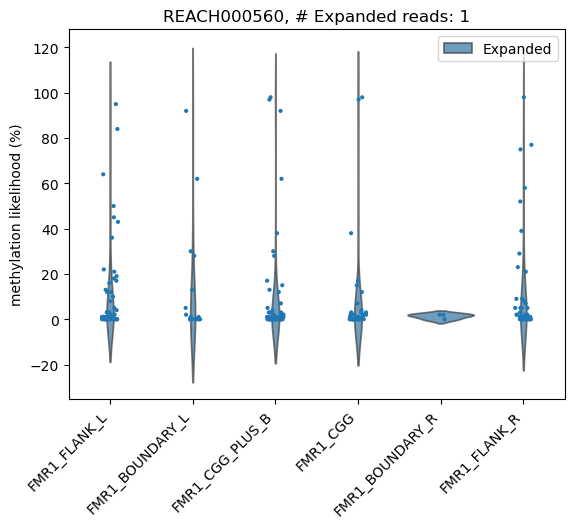

{'7724cf04-7f3c-49e6-b840-80174c400253': 'NA', '19114533-768a-4ced-ad7b-094d4bb6f5d6': 'Normal', 'c492a9b7-2d1c-4693-a7b0-19d17f546cf2': 'Normal', 'ec8aaed5-76d5-4771-a827-44e8ed2c990a': 'Normal', '7495d16c-6d6c-4dbe-bbde-e68d8659a9b8': 'Normal', '941395da-9dda-4f8e-9869-77d47192c5c9': 'Expanded', 'bfa1c5a7-77b3-44a9-93ef-03b1511f537e': 'Expanded', 'f8e7ada6-aca1-421f-971f-0f10eb91aef8': 'Expanded', '0bd12d5a-9141-4216-a118-b7b525d84f29': 'Expanded', '5e232e55-a220-44dc-97f0-59c656712f6a': 'Expanded', '.': 'NA'}
fragile_x//methylation_probs_REACH000561.png


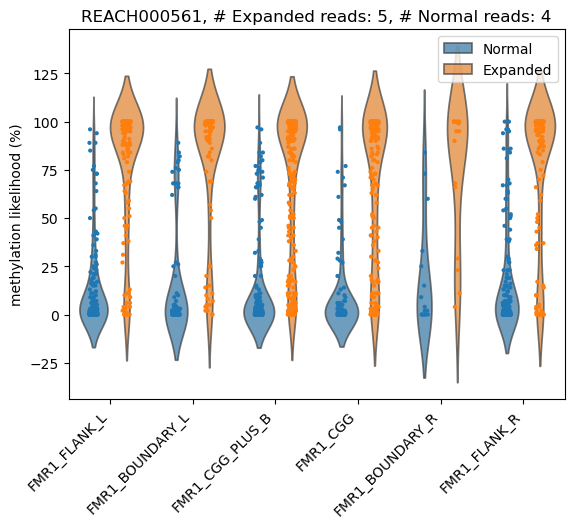

{'.': 'NA', '70638eee-9b25-4d63-b1ae-e50ac2da29ba': 'Normal', '188bb432-7a84-4bfd-a988-c59516a903f4': 'Normal', 'ec4f1675-3505-4bd5-a450-5e723776baf2': 'Normal', '5b0481e4-2d69-4862-a969-c5175171a813': 'Normal', '036caaab-f5dd-4b1b-b88c-264465c960d6': 'Normal', '9e9c1d20-cde5-4cb0-9d71-791b319d3fd9': 'Normal'}
fragile_x//methylation_probs_REACH000562.png


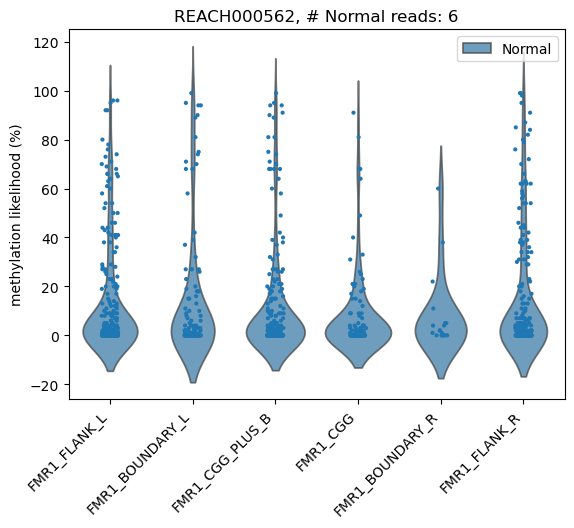

{'.': 'NA', '3dc80ce9-433b-4051-9a5a-52005e0d3627': 'Expanded', '3014939c-d797-4fa6-b669-8eec48317689': 'Expanded', '7d9480d5-4e99-4d03-bc91-6d873de242ef': 'Expanded', 'e83766dc-bbc9-4770-85e8-f83f85b7965f': 'Normal', '8b6bc117-17da-41c3-957f-a89b17221abb': 'Expanded', 'be004428-de04-4e9a-bb2f-3f5f0e54e1a1': 'Normal', '449cf08c-da8f-4fb3-95bb-e9f9dc5c9601': 'NA'}
fragile_x//methylation_probs_REACH000563.png


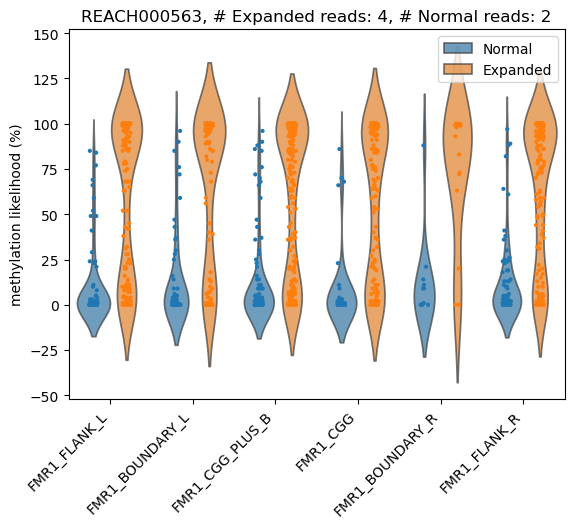

In [8]:
### family of REACH000560
samples = ['REACH000560', 'REACH000561', 'REACH000562', 'REACH000563']

for sample in samples:
    df_bps = get_bp_df(df_exnd, sample)
    target_regions = ['FMR1_CGG', 'FMR1_CGG_PLUS_B', 'FMR1_BOUNDARY_L', 'FMR1_FLANK_L', 'FMR1_BOUNDARY_R', 'FMR1_FLANK_R']
    #target_regions = ['FMR1_CGG_PLUS_B', 'FMR1_BOUNDARY_L']
    df_flt = df_bps.loc[df_bps.region_id.isin(target_regions)]
    #pd.set_option('display.max_rows', 10)
    #display(df_flt)
    counts = df_bps.loc[df_bps.region_id=='FMR1_CGG_PLUS_B'][['read_name', 'haplotype']].value_counts()
    counts_hap = counts.index.get_level_values(1).value_counts()
    title = sample
    for hp in counts_hap.index:
        title = f'{title}, # {hp} reads: {counts_hap[hp]}'
    hue_order = []
    for hp in ['Normal', 'Expanded']:
        if hp in counts_hap.index:
            hue_order.append(hp)
    plt.figure()
    sb.violinplot(data=df_flt, x='region_id', y='methylation', hue='haplotype', dodge=True, hue_order=hue_order, alpha=0.7, inner=None)
    ax = sb.stripplot(data=df_flt, x="region_id", y="methylation", hue='haplotype', jitter=True, dodge=True, legend=False, hue_order=hue_order, size=3)
    ax.get_legend().set_title("")
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('')
    plt.ylabel('methylation likelihood (%)')
    plt.title(title)
    fig_name = f'{dir_fig}/methylation_probs_{sample}.png'
    print(fig_name)
    plt.savefig(fig_name, bbox_inches='tight')
    plt.show()
    plt.close()

In [9]:
sample = 'REACH000561'
df_bps = get_bp_df(df_exnd, sample)
pd.set_option('display.max_rows', 10)
display(df_bps)

{'7724cf04-7f3c-49e6-b840-80174c400253': 'NA', '19114533-768a-4ced-ad7b-094d4bb6f5d6': 'N', 'c492a9b7-2d1c-4693-a7b0-19d17f546cf2': 'N', 'ec8aaed5-76d5-4771-a827-44e8ed2c990a': 'N', '7495d16c-6d6c-4dbe-bbde-e68d8659a9b8': 'N', '941395da-9dda-4f8e-9869-77d47192c5c9': 'PM', 'bfa1c5a7-77b3-44a9-93ef-03b1511f537e': 'PM', 'f8e7ada6-aca1-421f-971f-0f10eb91aef8': 'PM', '0bd12d5a-9141-4216-a118-b7b525d84f29': 'PM', '5e232e55-a220-44dc-97f0-59c656712f6a': 'PM', '.': 'NA'}


,region_id,methylation,read_name,bp_dev,hp_tag,haplotype
71,FMR1_FLANK_L,16,19114533-768a-4ced-ad7b-094d4bb6f5d6,-17,h1,N
72,FMR1_FLANK_L,75,19114533-768a-4ced-ad7b-094d4bb6f5d6,-17,h1,N
73,FMR1_FLANK_L,26,19114533-768a-4ced-ad7b-094d4bb6f5d6,-17,h1,N
74,FMR1_FLANK_L,89,19114533-768a-4ced-ad7b-094d4bb6f5d6,-17,h1,N
75,FMR1_FLANK_L,4,19114533-768a-4ced-ad7b-094d4bb6f5d6,-17,h1,N
...,...,...,...,...,...,...
1841,FMR1_FLANK_R,100,5e232e55-a220-44dc-97f0-59c656712f6a,5,h2,PM
1842,FMR1_FLANK_R,88,5e232e55-a220-44dc-97f0-59c656712f6a,5,h2,PM
1843,FMR1_FLANK_R,93,5e232e55-a220-44dc-97f0-59c656712f6a,5,h2,PM
1844,FMR1_FLANK_R,100,5e232e55-a220-44dc-97f0-59c656712f6a,5,h2,PM


{'44d59430-a21a-46d0-8c48-ec5fb0f3dcfb': 'Normal', 'a8a13e85-674a-47e2-87b9-02bacd53b6aa': 'Normal', '47d275ec-3aaa-427d-946d-434cff76c506': 'Normal', '2ebfa290-0e96-4f87-b614-1d332ebe427e': 'Normal', 'fb873c67-3d86-4e36-a285-1ede17210904': 'Normal', 'c6953b92-0b83-4e6e-9d9a-ce3069a4389f': 'Normal', 'e54e17d1-7df5-4f88-a86a-a1d2db71a51a': 'Normal', 'f66b7bfe-f0d1-4ff6-8e6d-7b4810c0aff2': 'Normal', 'e9b690d1-c60d-4f9c-a0a7-89d43c4fc2ff': 'Normal', '75022d4b-27da-47c8-b283-ea520387ca2e': 'Normal', 'cb28c1dc-3f79-4588-bc8c-b1814568bc03': 'Normal'}
fragile_x//methylation_probs_REACH000518.png


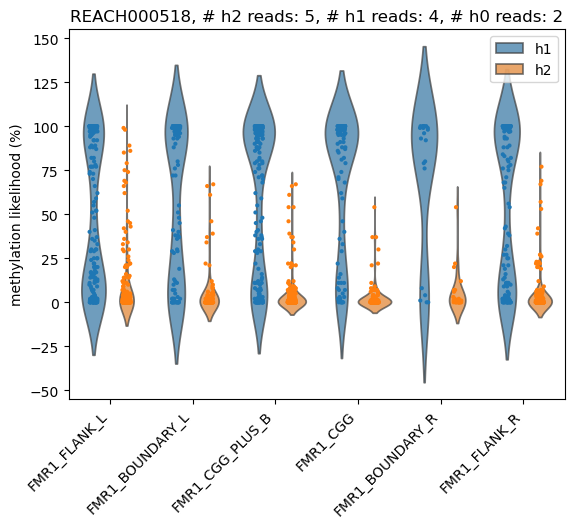

{'7df78a1e-0393-486b-892c-71b3d1b717f6': 'Expanded', '3e6c1567-5834-4d7f-b9ed-bb5454283f2d': 'Normal', '879a8cab-08b6-43a6-a9dd-b5f387d0cfe3': 'Normal', '499505f8-6b5b-4d47-82ca-c038be051baf': 'Normal', '73cc49a0-a6b9-413f-88a7-6c8c44119dd4': 'Normal', 'd96ec93b-c1e3-4ba0-af0b-a03b9873e853': 'Normal', '65c16750-f251-49fc-b5a3-bd47f71b1dd5': 'Normal', '90684e11-6725-49c3-b650-88b76ccc44e7': 'Normal', 'bf0af19d-2a7a-400c-924b-0bb089ff098b': 'Normal'}
fragile_x//methylation_probs_REACH000519.png


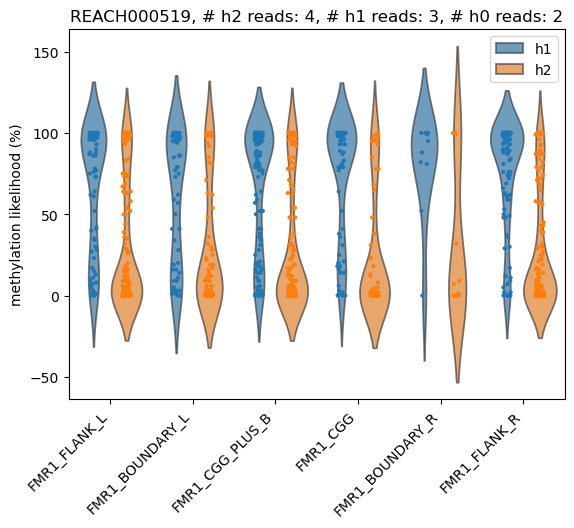

{'50e1b524-1d1c-406f-9350-e890b71902ef': 'Normal', 'be54aadc-dfa0-487b-95fa-e3149d3a2d7c': 'Normal', '00f9b098-78b4-4f41-b956-cbde27cee4a9': 'Normal', '9949e6f0-67f4-4a62-b94f-d1f75f2cb568': 'Normal', 'c0ba5548-2285-4ffb-b0fb-c9bef38d0065': 'Normal', 'cd2ccff1-24d9-4379-9a49-4304ca487f06': 'Normal', '.': 'NA'}
fragile_x//methylation_probs_REACH000523.png


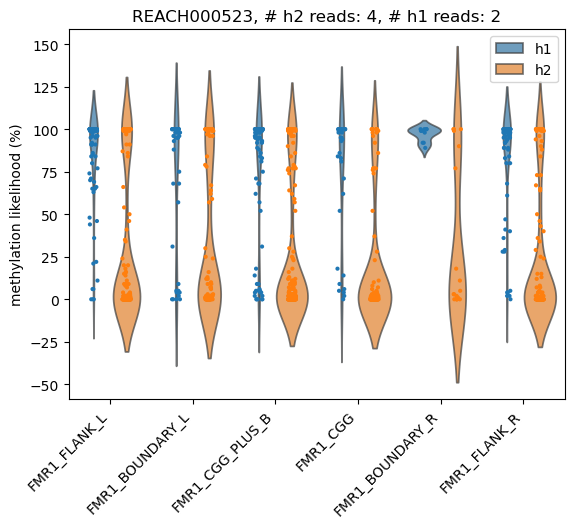

{'.': 'NA', 'e57b40bf-b888-4ced-8ccf-2b731b0cc5de': 'Normal'}
fragile_x//methylation_probs_REACH000524.png


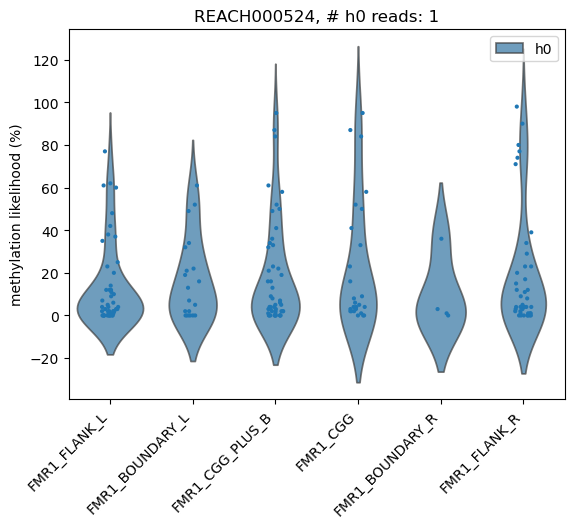

In [9]:
### family of REACH000518, Hp stratification, phasing is good and there is no very large hap
samples = ['REACH000518', 'REACH000519', 'REACH000523', 'REACH000524']

for sample in samples:
    df_bps = get_bp_df(df_exnd, sample)
    target_regions = ['FMR1_CGG', 'FMR1_CGG_PLUS_B', 'FMR1_BOUNDARY_L', 'FMR1_FLANK_L', 'FMR1_BOUNDARY_R', 'FMR1_FLANK_R']
    #target_regions = ['FMR1_CGG_PLUS_B', 'FMR1_BOUNDARY_L']
    df_flt = df_bps.loc[df_bps.region_id.isin(target_regions)]
    #pd.set_option('display.max_rows', 10)
    #display(df_flt)
    counts = df_bps.loc[df_bps.region_id=='FMR1_CGG_PLUS_B'][['read_name', 'hp_tag']].value_counts()
    counts_hap = counts.index.get_level_values(1).value_counts()
    title = sample
    for hp in counts_hap.index:
        title = f'{title}, # {hp} reads: {counts_hap[hp]}'
    hue_order = []
    for hp in ['h1', 'h2']:
        if hp in counts_hap.index:
            hue_order.append(hp)
    if len(hue_order) == 0:
        hue_order = ['h0']
    plt.figure()
    sb.violinplot(data=df_flt, x='region_id', y='methylation', hue='hp_tag', dodge=True, hue_order=hue_order, alpha=0.7, inner=None)
    ax = sb.stripplot(data=df_flt, x="region_id", y="methylation", hue='hp_tag', jitter=True, dodge=True, legend=False, hue_order=hue_order, size=3)
    ax.get_legend().set_title("")
    #sb.relplot(data=df_flt, x="region_id", y="methylation", hue='hp_tag', legend=False, hue_order=hue_order, size='bp_dev')

    #sb.violinplot(data=df_flt, x='region_id', y='methylation', hue='haplotype', dodge=True, hue_order=hue_order)
    #sb.stripplot(data=df_flt, x="region_id", y="methylation", hue='haplotype', jitter=True, dodge=True, legend=False, hue_order=hue_order)
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('')
    plt.ylabel('methylation likelihood (%)')
    plt.title(title)
    fig_name = f'{dir_fig}/methylation_probs_{sample}.png'
    print(fig_name)
    plt.savefig(fig_name, bbox_inches='tight')
    plt.show()
    plt.close()